In [3]:

import numpy as np
import matplotlib.pyplot as plt



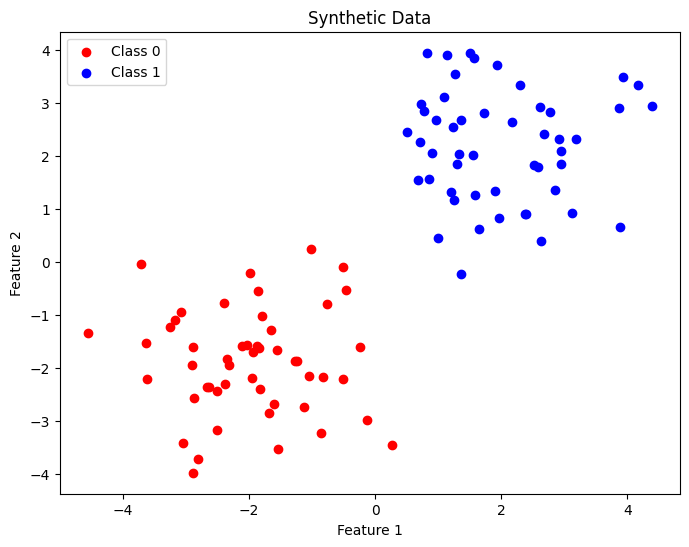

In [4]:
np.random.seed(0)

# Generate synthetic data
X = np.vstack([np.random.randn(50, 2) - [2, 2], np.random.randn(50, 2) + [2, 2]])
y = np.hstack([np.zeros(50), np.ones(50)])

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Data')
plt.legend()
plt.show()

In [9]:
class LinearSVM:
    def __init__(self, learning_rate=0.001, num_iters=1000, lambda_reg=0.01):
        self.learning_rate = learning_rate
        self.num_iters = num_iters
        self.lambda_reg = lambda_reg
    
    def fit(self, X, y):
        # Initialize parameters
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0
        
        # Convert labels to {-1, 1}
        y = np.where(y == 0, -1, 1)
        
        # Gradient descent
        for _ in range(self.num_iters):
            # Compute predictions
            y_pred = np.dot(X, self.w) + self.b
            
            # Compute the hinge loss gradient
            margin = y * y_pred
            mask = margin < 1
            gradient_w = self.lambda_reg * self.w - np.dot((mask * y), X) / m
            gradient_b = -np.sum(mask * y) / m
            
            # Update parameters
            self.w -= self.learning_rate * gradient_w
            self.b -= self.learning_rate * gradient_b
    
    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)


In [10]:
def plot_decision_boundary(X, y, w, b):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, np.sign(Z), alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k')
    plt.title('Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

In [11]:
svm = LinearSVM()
svm.fit(X, y)

Weights: [0.4261184  0.40728866]
Bias: -0.0045599999999999695


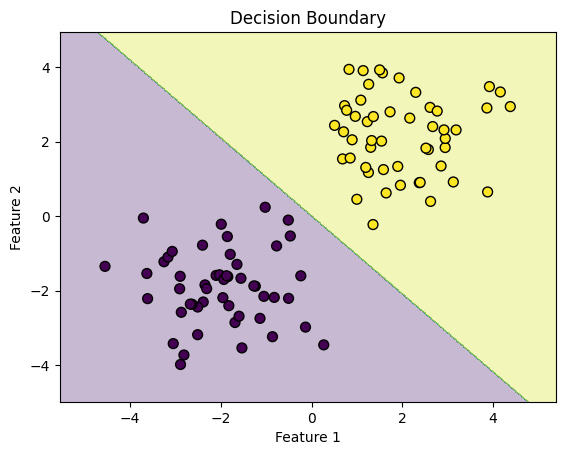

In [12]:
print("Weights:", svm.w)
print("Bias:", svm.b)

# Plot the decision boundary
plot_decision_boundary(X, y, svm.w, svm.b)